combine small txt files with metrics to long table

In [1]:
import pandas as pd
#from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

#import os
#os.chdir('E:/Master-thesis/7. source code/LiClipse/tspmean/src')
#import viz

metrics_dir='E:/Master-thesis/output/evaluation/metrics/PC/'
metrics_file='metrics_pc.csv'

#all files in the dir
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(metrics_dir) if isfile(join(metrics_dir, f))]

print onlyfiles

if metrics_file in onlyfiles:
    onlyfiles.remove(metrics_file)
      
df_list=[]
    
for filename in onlyfiles:

    df=pd.read_csv(metrics_dir+filename,delimiter=',',header=0)
    df_list.append(df)

df_full=pd.concat(df_list,axis=0)

#print df_full
#df_full.drop('parameter',axis=1,inplace=True)
df_full.reset_index(inplace=True)
df_full.drop('index',axis=1,inplace=True)
#print df_full
#df_em=df_full.loc[(df_full.ordering=='EM') | (df_full.ordering=='EMmanhattan')]
#df = df.drop(df[<some boolean condition>].index)
df_full.drop(df_full[df_full.ordering=='original'].index,inplace=True)
df_full.drop(df_full[df_full.parameter==0.2].index,inplace=True)
df_full.drop(df_full[df_full.parameter==0.3].index,inplace=True)
df_full.drop(df_full[df_full.parameter==0.4].index,inplace=True)
df_full.drop(df_full[df_full.parameter==0.5].index,inplace=True)

#df_full.drop(df_full[(df_full.metric=='outliers') & (df_full.value>0.3)].index,inplace=True)
#print df_full
df_full['ratio']=0
df_full['rank']=0
#df_full['metric']=df_full['parameter']
#df_full.drop('parameter',axis=1,inplace=True)
ordering_methods=df_full.ordering.unique()
datasets=df_full.dataset.unique()

for dataset in datasets:
    #loc metrics for this dataset
    df_dataset=df_full.loc[df_full.dataset==dataset]
    metrics=df_dataset.metric.unique()
    for metric in metrics:
        #find all rows
        data=df_dataset.loc[df_dataset.metric==metric]
        
        params=data.parameter.unique()
        
        for parameter in params:
            data_parameter=data.loc[data.parameter==parameter]
            base=data_parameter.loc[data.ordering=='random','value'].values[0]
            if metric=='mutual_information':
                data_parameter.sort_values(by='value',inplace=True,ascending=False)
            else:
                data_parameter.sort_values(by='value',inplace=True,ascending=True)
            #print data
            #print base
            rank=1
            for index,row in data_parameter.iterrows():
                df_full.loc[index,'ratio']=df_full.loc[index,'value']/base
                df_full.loc[index,'rank']=rank
                rank+=1
            
df_full

['aaup_pc1.txt', 'aaup_pc2.txt', 'abalone_pc1.txt', 'abalone_pc2.txt', 'alon_pc1.txt', 'alon_pc2.txt', 'auto_pc1.txt', 'auto_pc2.txt', 'bike_pc1.txt', 'bike_pc2.txt', 'cars_pc1.txt', 'cars_pc2.txt', 'community_pc1.txt', 'community_pc2.txt', 'golub_pc1.txt', 'golub_pc2.txt', 'income_pc1.txt', 'income_pc2.txt', 'magic_pc1.txt', 'magic_pc2.txt', 'noisy_wave_pc1.txt', 'noisy_wave_pc2.txt', 'olive_pc1.txt', 'olive_pc2.txt', 'parkinson_pc1.txt', 'parkinson_pc2.txt', 'subway_pc1.txt', 'subway_pc2.txt', 'traffic_pc21.txt', 'waveform_pc1.txt', 'waveform_pc2.txt', 'wdbc_pc1.txt', 'wdbc_pc2.txt', 'wine_pc1.txt', 'wine_pc2.txt', 'yeast_pc1.txt', 'yeast_pc2.txt']


C:\Users\khamidova\Anaconda2\lib\site-packages\ipykernel\__main__.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,dataset,ordering,metric,parameter,value,ratio,rank
0,aaup,TSNE,line_crossing,no_param,0.098839,0.822227,7
1,aaup,TSNE,mutual_information,no_param,9.582261,1.355781,7
2,aaup,random,line_crossing,no_param,0.120209,1.000000,8
3,aaup,random,mutual_information,no_param,7.067705,1.000000,8
4,aaup,TSPmeans,line_crossing,no_param,0.075887,0.631296,3
5,aaup,TSPmeans,mutual_information,no_param,12.166261,1.721388,4
6,aaup,EM,line_crossing,no_param,0.075983,0.632091,4
7,aaup,EM,mutual_information,no_param,12.334778,1.745231,3
8,aaup,EMmanhattan,line_crossing,no_param,0.079489,0.661257,5
9,aaup,EMmanhattan,mutual_information,no_param,11.939079,1.689244,5


Pivot table:
Metrics as columns, datasets and ordering as rows
Save table to Excel sheet

In [8]:
import numpy as np
#change names
df_full.loc[df_full['ordering']=='EM','ordering']='EM-euc'
df_full.loc[df_full['ordering']=='EMmanhattan','ordering']='EM-man'
df_full.loc[df_full['ordering']=='HColo','ordering']='HC-olo'
df_full.loc[df_full['ordering']=='TSPmeans','ordering']='TSP-means'
df_full.loc[df_full['metric']=='line_crossing','metric']='LC'
df_full.loc[df_full['metric']=='mutual_information','metric']='MI'
df_full.loc[df_full['metric']=='outliers','metric']='Outliers'
#df_full.loc[df_full['metric']=='outliers','metric']=''
#df_full.loc[df_full['metric']=='path_length_manhattan','metric']='LM'
df_full.drop(df_full[df_full.parameter==0.2].index,inplace=True)
df_full.drop(df_full[df_full.parameter==0.3].index,inplace=True)
df_full.drop(df_full[df_full.parameter==0.4].index,inplace=True)
df_full.drop(df_full[df_full.parameter==0.5].index,inplace=True)
#df_full['ratio']=df_full['ratio'].apply(lambda x: np.round(x, decimals=3))
df_full['value']=df_full['value'].apply(lambda x: np.round(x, decimals=5))
data=pd.pivot_table(df_full,values='value',index=['dataset','metric','parameter'],columns='ordering')

writer=pd.ExcelWriter('pc.xlsx')
data.to_excel(writer)
writer.close()
data

ordering                         EM-euc      EM-man      HC-olo          LK  \
dataset  metric   parameter                                                   
aaup     LC       no_param      0.07598     0.07949     0.07510     0.07510   
         MI       no_param     12.33478    11.93908    12.47450    12.47450   
         Outliers 0.001         0.83482     0.83860     0.83370     0.83370   
                  0.005         0.27205     0.27774     0.26741     0.26741   
                  0.01          0.10071     0.10535     0.09912     0.09912   
                  0.025         0.02736     0.02677     0.02716     0.02716   
                  0.05          0.00769     0.00782     0.00775     0.00775   
                  0.075         0.00305     0.00292     0.00311     0.00311   
                  0.1           0.00166     0.00179     0.00152     0.00152   
abalone  LC       no_param      0.05210     0.05831     0.05866     0.05732   
         MI       no_param      8.15182     7.43482     7.53304     7.77569   
         Outliers 0.001         0.65688     0.69278     0.68110     0.64604   
                  0.005         0.27375     0.28590     0.28553     0.28553   
                  0.01          0.09321     0.09648     0.10088     0.09368   
                  0.025         0.01543     0.01683     0.01767     0.01748   
                  0.05          0.00337     0.00449     0.00467     0.00514   
                  0.075         0.00140     0.00140     0.00178     0.00196   
                  0.1           0.00075     0.00093     0.00075     0.00084   
alon     LC       no_param      0.10479     0.10360     0.10582     0.10103   
         MI       no_param   3314.80592  3321.55890  3312.19863  3324.82099   
         Outliers 0.001         0.99708     0.99705     0.99708     0.99700   
                  0.005         0.96256     0.96146     0.96102     0.96070   
                  0.01          0.87659     0.87530     0.87452     0.87347   
                  0.025         0.55237     0.54963     0.55407     0.54738   
                  0.05          0.25164     0.25248     0.25182     0.24502   
                  0.075         0.14323     0.14300     0.13963     0.13495   
                  0.1           0.09301     0.09286     0.08860     0.08656   
auto     LC       no_param      0.06588     0.07392     0.06093     0.06223   
         MI       no_param     18.44749    17.56385    18.56276    18.76799   
         Outliers 0.001         0.12256     0.12171     0.12673     0.11766   
...                                 ...         ...         ...         ...   
waveform Outliers 0.05          0.00210     0.00219     0.00216     0.00216   
                  0.075         0.00070     0.00070     0.00070     0.00070   
                  0.1           0.00023     0.00018     0.00023     0.00023   
wdbc     LC       no_param      0.12534     0.13058     0.12922     0.11966   
         MI       no_param     22.15161    21.44811    21.50566    22.28236   
         Outliers 0.001         0.96298     0.96491     0.96520     0.96450   
                  0.005         0.57135     0.58061     0.58125     0.57165   
                  0.01          0.28219     0.28606     0.28225     0.27545   
                  0.025         0.06960     0.07288     0.07217     0.07042   
                  0.05          0.02279     0.02326     0.02302     0.02232   
                  0.075         0.01113     0.01183     0.01131     0.01060   
                  0.1           0.00721     0.00767     0.00732     0.00703   
wine     LC       no_param      0.20199     0.19206     0.19710     0.19710   
         MI       no_param     15.59060    15.66341    15.55803    15.55803   
         Outliers 0.001         0.96889     0.97148     0.97061     0.97061   
                  0.005         0.94036     0.93518     0.94382     0.94382   
                  0.01          0.84140     0.83621     0.84226     0.84226   
                  0.025         0.43561     0.4334

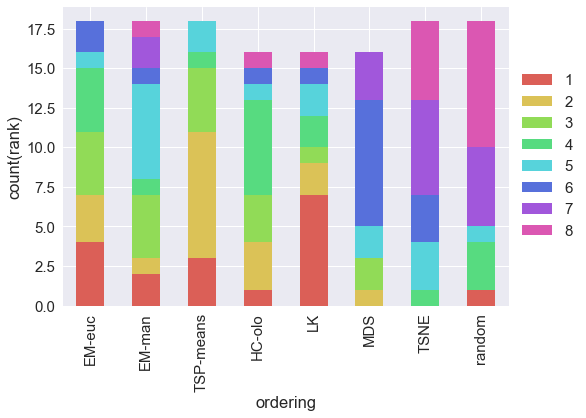

rank   ordering    1    2    3    4    5    6    7    8
0        EM-euc  4.0  3.0  4.0  4.0  1.0  2.0  NaN  NaN
1        EM-man  2.0  1.0  4.0  1.0  6.0  1.0  2.0  1.0
2        HC-olo  1.0  3.0  3.0  6.0  1.0  1.0  NaN  1.0
3            LK  7.0  2.0  1.0  2.0  2.0  1.0  NaN  1.0
4           MDS  NaN  1.0  2.0  NaN  2.0  8.0  3.0  NaN
5          TSNE  NaN  NaN  NaN  1.0  3.0  3.0  6.0  5.0
6     TSP-means  3.0  8.0  4.0  1.0  2.0  NaN  NaN  NaN
7        random  1.0  NaN  NaN  3.0  1.0  NaN  5.0  8.0


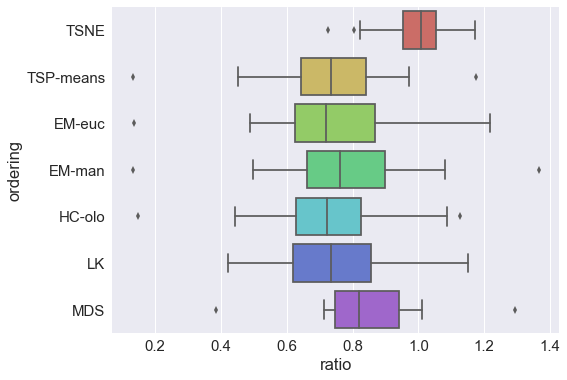

In [33]:
import seaborn as sns
sns.set(font_scale=1.5)
#sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set_palette(sns.color_palette("hls", 8))
#sns.set_palette(sns.color_palette("husl", 8))

df_full.loc[df_full['ordering']=='EM','ordering']='EM-euc'
df_full.loc[df_full['ordering']=='EMmanhattan','ordering']='EM-man'
df_full.loc[df_full['ordering']=='HColo','ordering']='HC-olo'
df_full.loc[df_full['ordering']=='TSPmeans','ordering']='TSP-means'


orderings = ['EM-euc', 'EM-man', 'TSP-means', 'HC-olo', 'LK', 'MDS', 'TSNE','random']
mapping = {ordering: i for i, ordering in enumerate(orderings)}

sns.plt.clf()
#sns.plt.cla()
data_plot=df_full.copy()
#data_plot=data_plot.loc[data_plot.parameter==0.01]
data_plot=data_plot.loc[data_plot.metric=='line_crossing']
#print data_plot

#print data_plot
data_places=data_plot[['ordering','rank','value']]
data_places=pd.pivot_table(data_places,values='value',index=['ordering'],columns=['rank'],aggfunc='count')
data_places.reset_index(inplace=True)

#data_places.drop('rank',axis=1,inplace=True)
key = data_places['ordering'].map(mapping)
#print key

#Rank stacket barplot
data_places.iloc[key.argsort()].plot(x='ordering',kind='bar', stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax=sns.plt.gca()
ax.set(ylabel='count(rank)')
sns.plt.show()

#save data to Excel
print data_places
writer=pd.ExcelWriter('lc.xlsx')
data_places.iloc[key.argsort()].to_excel(writer)
writer.close()

#EXCLUDE random ordering
data_plot=data_plot.loc[data_plot.ordering!='random']

#data_plot5=data_plot.loc[data_plot.metric==5]
#data_plot10=data_plot.loc[data_plot.metric==10]
#data_plot15=data_plot.loc[data_plot.metric==15]
#data_plot20=data_plot.loc[data_plot.metric==20]
#data_plot30=data_plot.loc[data_plot.metric==30]

#BOXPLOTS for each metric

fig=sns.plt.figure()
fig.set_size_inches(8, 6)
sns.boxplot(x="ratio", y="ordering", data=data_plot)
#sns.plt.xlim(0,1)
sns.plt.show()